In [1]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install wordcloud

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from textblob import TextBlob 
from wordcloud import WordCloud

plt.style.use('fivethirtyeight')

# Problem Statement

Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [84]:
# Reading the data
df=pd.read_csv("Elon_musk.csv",encoding='latin1')

In [85]:
df

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [86]:
import nltk
from nltk.corpus import stopwords

In [87]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [88]:
def clean_tweet(tweet):
    if type(tweet) == np.float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) 
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub('<[a-zA-Z0-9+ ]+>','',temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in set(stopwords.words('english'))]
    temp = " ".join(word for word in temp)
    return temp

In [89]:
df['Text']=df['Text'].apply(lambda x: clean_tweet(x))

C:\Users\Beauty\AppData\Local\Temp\ipykernel_1120\3499637099.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if type(tweet) == np.float:


In [90]:
df

,Text
0,alien
1,ray tracing cyberpunk hdr next level tried
2,great interview
3,doge underestimated
4,congratulations tesla china amazing execution ...
...,...
1994,true sounds surreal negative propaganda still ...
1995,make sure read ur terms amp conditions clickin...
1996,samwise gamgee
1997,altho dumb dumber


In [91]:
# Create a function for Subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Create a function for Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Creating 2 new columns for Subjectivity and Polarity
df['Subjectivity']=df['Text'].apply(getSubjectivity)
df['Polarity']=df['Text'].apply(getPolarity)

In [92]:
df

,Text,Subjectivity,Polarity
0,alien,0.750000,-0.250000
1,ray tracing cyberpunk hdr next level tried,0.000000,0.000000
2,great interview,0.750000,0.800000
3,doge underestimated,0.000000,0.000000
4,congratulations tesla china amazing execution ...,0.322222,0.200000
...,...,...,...
1994,true sounds surreal negative propaganda still ...,0.508333,0.111111
1995,make sure read ur terms amp conditions clickin...,0.888889,0.500000
1996,samwise gamgee,0.000000,0.000000
1997,altho dumb dumber,0.500000,-0.375000


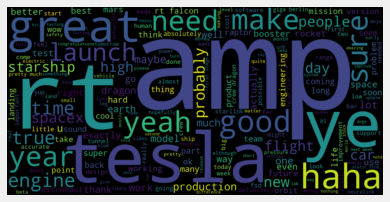

In [93]:
# Plotting the word cloud
allwords=' '.join([twts for twts in df['Text']])
wc=WordCloud(width=2000,height=1000,random_state=8).generate(allwords)

plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [94]:
# Creating a function for sentiment analysis
def getAnalysis(score):
    if score>0:
        return 'Positive'
    elif score<0:
        return 'Negetive'
    else:
        return 'Neutral'

In [95]:
df['Analysis']=df['Polarity'].apply(getAnalysis)

In [96]:
df

,Text,Subjectivity,Polarity,Analysis
0,alien,0.750000,-0.250000,Negetive
1,ray tracing cyberpunk hdr next level tried,0.000000,0.000000,Neutral
2,great interview,0.750000,0.800000,Positive
3,doge underestimated,0.000000,0.000000,Neutral
4,congratulations tesla china amazing execution ...,0.322222,0.200000,Positive
...,...,...,...,...
1994,true sounds surreal negative propaganda still ...,0.508333,0.111111,Positive
1995,make sure read ur terms amp conditions clickin...,0.888889,0.500000,Positive
1996,samwise gamgee,0.000000,0.000000,Neutral
1997,altho dumb dumber,0.500000,-0.375000,Negetive


In [100]:
# Printing all the positive tweets
j=1
sorted_df=df.sort_values(by=['Polarity'])
for i in range(0,sorted_df.shape[0]):
    if (sorted_df.Analysis[i]=='Positive'):
        print(str(j),")",sorted_df['Text'][i])
        print()
        j=j+1

1 ) great interview

2 ) congratulations tesla china amazing execution last year next even

3 ) happy new year ox

4 ) haha thanks

5 ) indeed tweets definitely represent real world time allocation

6 ) entertaining outcome likely

7 ) getting real

8 ) definitely issues sentencing seems bit high

9 ) thanks fixing

10 ) true power haha

11 ) rt nasa selected falcon heavy launch first two elements lunar gateway together one mission

12 ) predict cash flow reasonably well starlink ipo

13 ) seem bit high

14 ) doge appears inflationary meaningfully fixed coins per unit time whereas

15 ) wow

16 ) cute

17 ) extremely misleading image reflect true time cost people rain amp pain

18 ) fun crypto

19 ) true

20 ) easy two decades intense work look old notes emails texts

21 ) read great

22 ) sure

23 ) great thing restaurants get hang strangers sjm

24 ) much wow

25 ) said ship landing burn clear solution greate

26 ) still use hot gas maneuvering rcs thrusters

27 ) higher isp

28 ) tr

482 ) rt launch crew dragon first operational mission astronauts board spacex launch 21st cargo resupply mi

483 ) maybe used many magenta spotlights

484 ) fate loooves irony haha

485 ) glad spacex could help prioritizing emergency responders amp locations internet connectivity

486 ) true

487 ) seven years sure 30m new fully electric vehicles per year six years maybe five ye

488 ) original cars

489 ) new version coming soon

490 ) totally head tesla delivery center near amp maybe help new owners would cool

491 ) completely agree

492 ) yes flaps directly driven electric motors gearbox hydraulics

493 ) thanks tesla team great work deliveries new owners super appreciate accommodating us delivery ti

494 ) mostly 304l 301 broke 301 304 interface sn9

495 ) need enough height test body flaps amp drawing propellant headers vs main tanks se

496 ) first flight 15km 50 000 ft

497 ) sure

498 ) true

499 ) rt falcon 9 launch super cool interstellar mapping acceleration probe imap help


748 ) haha

749 ) maybe feeling bern haha

750 ) launch pad connector damaged storm fixed might able

751 ) sounds great

752 ) haha

753 ) like great sense humor

754 ) exactly

755 ) onion rose

756 ) wow think lot

757 ) haha

758 ) rt pick energetic wallpapers charge everyday adventure

759 ) almost decade ago original dragon background

760 ) fair point discuss team

761 ) amazing

762 ) great song

763 ) nickel biggest challenge high volume long range batteries australia amp ca

764 ) haha

765 ) lot potential lithium pretty much everywhere

766 ) whoa cool

767 ) need high brinell hardness amp high corrosion resistance cybertruck faceted

768 ) really want great fun could la austin

769 ) cool

770 ) rt new video tesla model important car

771 ) great song

772 ) haha thanks kara

773 ) sure

774 ) exactly

775 ) cool model 3 review

776 ) yeah would way better send everyone 6k

777 ) jammed gills special interests earmarks stimulus direct payments consumers

778 ) pretty much


In [101]:
# Printing all the Negetive tweets
j=1
sorted_DF=df.sort_values(by=['Polarity'])
for i in range(0,sorted_DF.shape[0]):
    if (sorted_DF.Analysis[i]=='Negetive'):
        print(str(j),")",sorted_DF['Text'][i])
        print()
        j=j+1

1 ) alien

2 ) frodo underdoge thought would fail

3 ) app sucks

4 ) starlink staggeringly difficult technical amp economic endeavor however

5 ) spacex needs pass deep chasm negative cash flow next year

6 ) everyone tesla receives stock comp stock options take table missing

7 ) dumb

8 ) tough one

9 ) rt mission enables access everyday people dream going space

10 ) please consider working neuralink short term solve brain spine injuries long term human ai symbiosis latte

11 ) earth small amp smaller still

12 ) little

13 ) drive without using prnd stalk stick days gets annoying go back amp use shifter

14 ) stalks car guesses drive direction based obstacles sees context amp nav map

15 ) yes although crazy turn fsd

16 ) also road hell mostly paved bad intentions

17 ) sorry version confusion v8 1 say fsd separate version number rest car

18 ) rt spacex rideshare offering provides increased access space small satellite operators seeking reliable affordable rid

19 ) rt due unfav

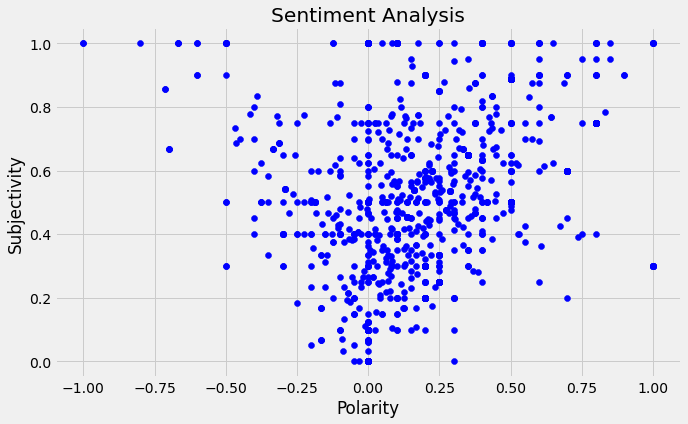

In [104]:
# Plotting Subjectivity vs Polarity

plt.figure(figsize=(10,6))
for i in range(0,df.shape[0]):
    plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='blue')
    
plt.title('Sentiment Analysis')
plt.ylabel('Subjectivity')
plt.xlabel('Polarity')
plt.show()

From the graph we can see the number of positive tweets are higher then the number of negetive tweets.

In [108]:
# Percentage of positive tweets
ptweets=df[df['Analysis']=='Positive']
ptweets=ptweets['Text']
percent=np.round(ptweets.shape[0]/df.shape[0]*100,1)
print("The percentage of positive tweets are:: ",percent)

The percentage of positve tweets are::  42.6


In [110]:
# Percent of negetive tweets
ntweets=df[df['Analysis']=='Negetive']
ntweets=ntweets['Text']
per=np.round(ntweets.shape[0]/df.shape[0]*100,1)
print("The percentage of negetive tweets are:: ",per)

The percentage of negetive tweets are::  10.3


In [112]:
# Percent of neutral tweets
n_tweets=df[df['Analysis']=='Neutral']
n_tweets=n_tweets['Text']
percentage=np.round(n_tweets.shape[0]/df.shape[0]*100,1)
print("The percentage of neutral tweets are:: ",percentage)

The percentage of neutral tweets are::  47.2


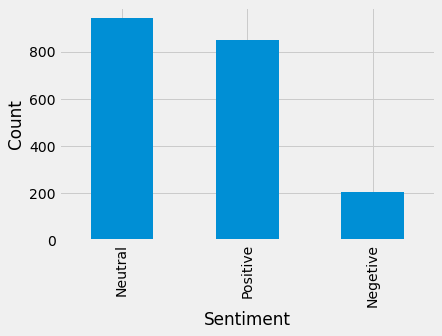

In [115]:
# Count plot

plt.xlabel('Sentiment')
plt.ylabel('Count')
df.Analysis.value_counts().plot(kind='bar')
plt.show()